# **EEG classification using a Deep Convolutional Recurrent Neural Network (DCRNN)**

**Here are some benefits of using DCRNN models for EEG signals:**

* **Improved spatial and temporal feature learning:** DCRNNs combine the benefits of both convolutional neural networks (CNNs) and recurrent neural networks (RNNs). The CNN layers can learn spatial features from the EEG signals, while the RNN layers can capture temporal dependencies. This combination can lead to improved feature learning and better classification accuracy.

* **Robust to noise and artifacts:** EEG signals are often contaminated with noise and artifacts, which can affect the performance of traditional machine learning models. DCRNNs can handle noisy and non-stationary signals better than other models, as they can learn robust features from the raw signals.

* **Ability to capture long-term dependencies:** DCRNNs have a memory mechanism that allows them to capture long-term dependencies in the EEG signals. This is particularly useful for EEG-based tasks such as seizure detection, where the occurrence of seizures can depend on events that happen over a long period.

* **Reduced need for hand-crafted features:** Traditional EEG signal processing methods often require hand-crafted features to be extracted from the raw signals. This process can be time-consuming and may require domain expertise. DCRNNs can learn features directly from the raw signals, reducing the need for hand-crafted features.

* **Generalization to new subjects and tasks:** DCRNNs can be trained on a large dataset of EEG signals and can generalize well to new subjects and tasks. This is particularly useful for clinical applications, where EEG data may be limited, and the model needs to be able to work with new data from different patients.

![3-Figure1-1](https://user-images.githubusercontent.com/68053788/223587328-6024ea2c-998f-4ab5-b30b-ee69c113718a.png)



![3-Figure2-1](https://user-images.githubusercontent.com/68053788/223587751-a8d166ae-a8c5-4b00-a5ff-61ca93ed6856.png)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense, Flatten, BatchNormalization

# Generate sample EEG data
num_samples = 128
num_channels = 32
# Define RNN parameters
time_steps = 500 # number of time steps
num_features = num_channels # number of features


model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(time_steps, num_features)))
model.add(BatchNormalization())
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

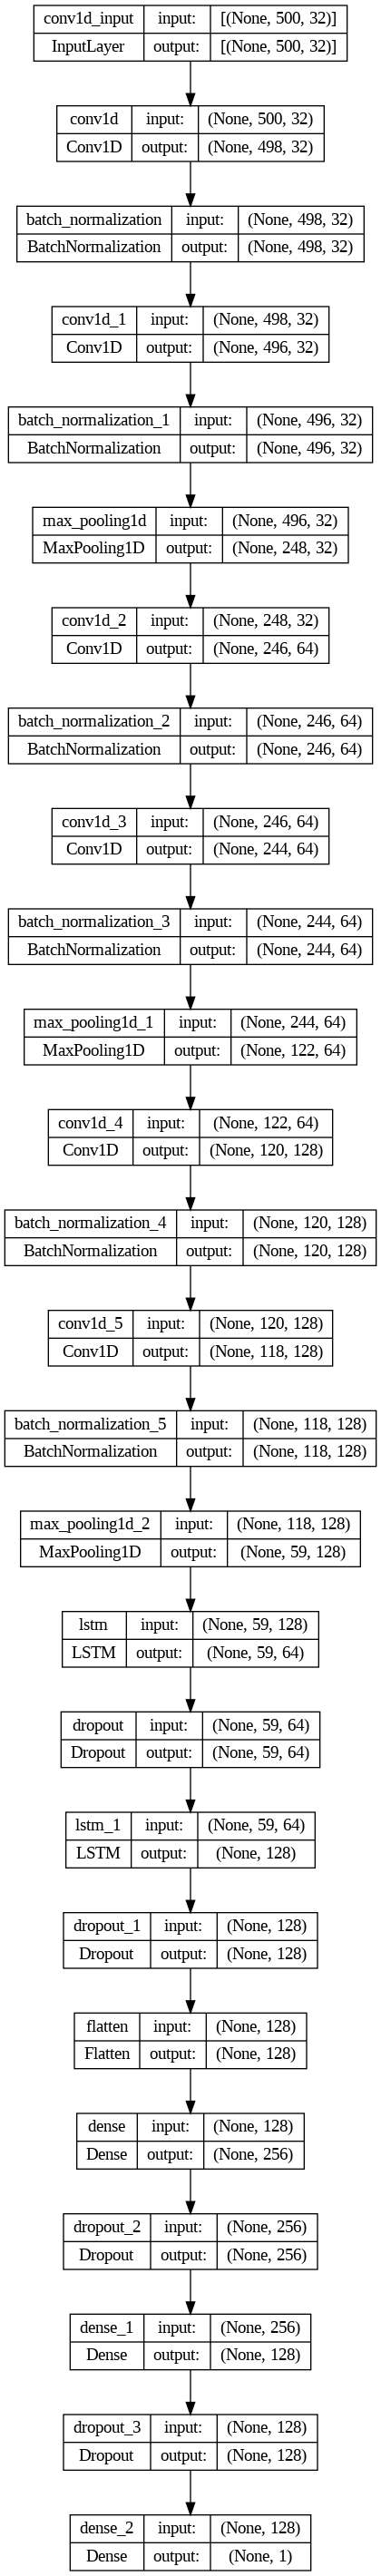

In [3]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='EEG_with_DCRNN.png', show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# X_train and X_test are 3D arrays of shape (n_samples, n_timesteps, n_features)
# y_train and y_test are 2D arrays of shape (n_samples, n_classes)

# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))




In [ ]:
# evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

In [ ]:

# generate predictions on test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

# generate classification report
cr = classification_report(y_true, y_pred)
print('Classification Report:')
print(cr)